## For more clear picture see the simulation at
## https://mesh-sim-97.herokuapp.com/

In [1]:
import numpy as np
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math
# %matplotlib qt

## Helping functions

In [2]:
def get_cycles(xs, ys):
    _xs, _ys = [xs[0]], [ys[0]]
    for i in range(1, len(xs)):
        if not (xs[i] == xs[i - 1] and ys[i] == ys[i - 1]):
            _xs.append(xs[i])
            _ys.append(ys[i])
    xs, ys = _xs, _ys
    past_coor = [(xs[0], ys[0])]
    shapes = []
    i = 1
    while i < len(xs):
        coor_i = (xs[i], ys[i])
        if coor_i not in past_coor:
            past_coor.append(coor_i)
        else:
            past_coor.append(coor_i)
            past_coor = past_coor[past_coor.index(coor_i):]
            if len(past_coor) > 3:
                shapes.append(past_coor[past_coor.index(coor_i):])
            past_coor = [(xs[i + 1], ys[i + 1])]
            i += 1
        i += 1
    return shapes

In [3]:
def correct_z_height(z_height: float, zs_heights: list):
    idx = np.searchsorted(zs_heights, z_height)
    if abs(z_height - zs_heights[idx - 1]) < abs(zs_heights[idx] - z_height):
        z_height = zs_heights[idx - 1]
    else:
        z_height = zs_heights[idx]
    return z_height

# Let's create the mesh
(`default.stl` needs to be rotated to correct it's orientation)

In [4]:
M = mesh.Mesh.from_file('default.stl')
M.rotate([-1, 0, 0], math.radians(90))

exception (False, 'b\'\\x15b\\x00\\x00\\x00\\x00\\xc9,cb\\xa4\\xee\\xa4a\\x00\\x00\\x00\\x00\\x12\\xeavb\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x80\\xbf\\x00\\x00\\x00\\x00\\xe3\\xc6nb\\x00\\x00\\x00\\x00\\xb1\\x1f>b\\x90;ob\\x00\\x00\\x00\\x00\\x12\\xea8b\\x00\\x00pb\\x00\\x00\\x00\\x00\\x00\\x00pb\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x80\\xbf\\x00\\x00\\x00\\x00\\x00\\x00pb\\x00\\x00\\x00\\x00\\x00\\x00pb\\x90;ob\\x00\\x00\\x00\\x00\\x12\\xea8b\\xe3\\xc6nb\\x00\\x00\\x00\\x00t\\xb43b\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x80\\xbf\\x00\\x00\\x00\\x80\\x00\\x00pb\\x00\\x00\\x00\\x00\\x00\\x00pb\\xe3\\xc6nb\\x00\\x00\\x00\\x00t\\xb43b\\x00\\x00pb\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x80\\xbf\\x00\\x00\\x00\\x00\\x00\\x00pb\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xe3\\xc6nb\\x00\\x00\\x00\\x00t\\xb43bglmb\\x00\\x00\\x00\\x00[\\xa7.b\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x80\\xbf\\x00\\x00\\x00\\x00\\x00\\x00pb\\x00\\x00\\x00\\x00\\

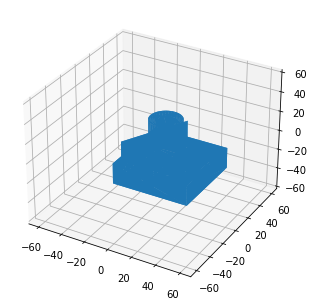

In [5]:
fig = plt.figure()
axes = mplot3d.Axes3D(fig)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(M.vectors))
scale = M.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)
plt.show()

## Now let's plot all the z-heights

In [6]:
zs = sorted([(z, (idx_i, idx_j))  for idx_i, _zs in enumerate(M.z) for idx_j, z in enumerate(_zs)])

In [7]:
d = {}
for z, idx in zs:
    z = z
    if z in d:
        d[z].append(idx)
    else:
        d[z] = [idx]

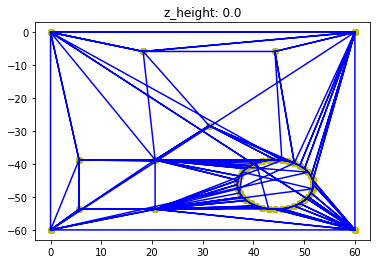

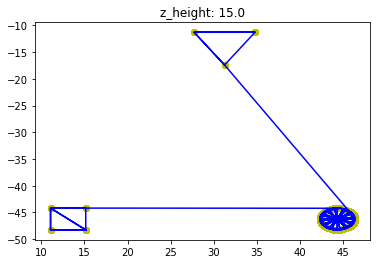

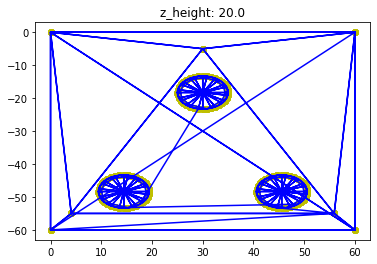

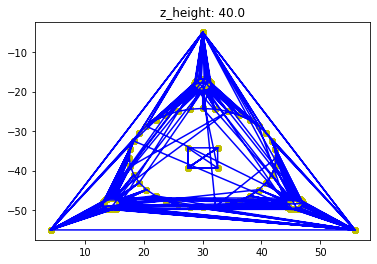

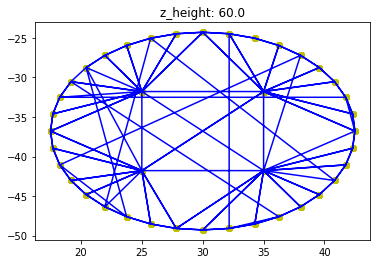

In [8]:
for z_height in d.keys():
    idxs = np.array(d[z_height])
    xs = [x for x in M.x[idxs[:,0], idxs[:,1]]]
    ys = [y for y in M.y[idxs[:,0], idxs[:,1]]]
    # if len(xs) < 4: continue
    if len(np.unique(xs)) < 2: continue
    if len(np.unique(ys)) < 2: continue
    plt.figure()
    plt.scatter(xs, ys, c='y')
    plt.plot(xs, ys, c='b')
    plt.title(f"z_height: {z_height}")

---

# Now let's plot the sub cycles for some z-height

In [9]:
# Specify the z-height
z_height = 20.0

In [10]:
z_height = correct_z_height(z_height, list(d.keys()))
idxs = np.array(d[z_height])
xs = np.array([x for x in M.x[idxs[:,0], idxs[:,1]]])
ys = np.array([y for y in M.y[idxs[:,0], idxs[:,1]]])

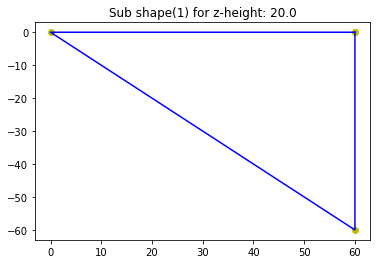

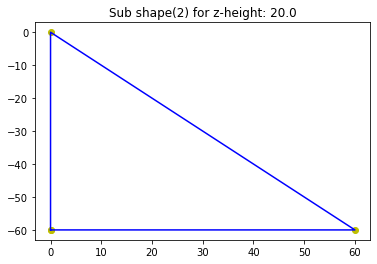

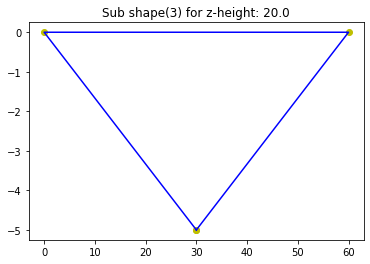

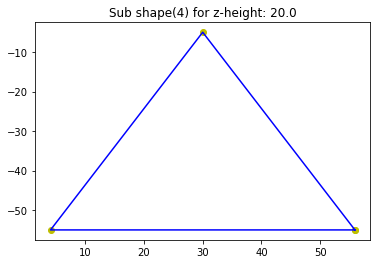

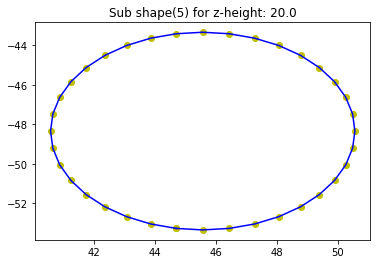

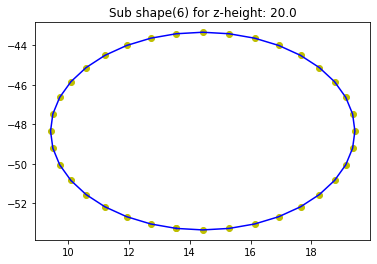

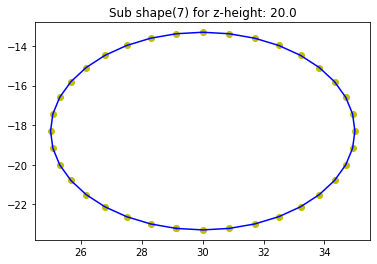

In [11]:
shapes = get_cycles(xs, ys)
for idx, shape in enumerate(shapes):
    shape = np.array(shape)
    xs = shape[:, 0]
    ys = shape[:, 1]
    plt.figure()
    plt.scatter(xs, ys, c='y')
    plt.plot(xs, ys, c='b')
    plt.title(f"Sub shape({idx + 1}) for z-height: {z_height}")


# Now lets scan mesh from multiple perspectives

In [12]:
# Now let's scan mesh from +X-axis to -X-axis
M = M.rotate([0, -1, 0], math.radians(90))
# Now go cell '6' and perform same steps and have differenct perspectives

## For more clear picture see the simulation at
## https://mesh-sim-97.herokuapp.com/